# Soil Canister (low/high SOC) first spectra - April 2, 2021

Positions in this notebook are the literal encoder positions (add 2.0 to the positions that are usually recorded in the data, as I estimate that a position less than 2.0 would not have the window in the soil yet).

In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt

file_name = "more_210402/tests_210402.h5"
h5_file = h5py.File(file_name, "r")

In [2]:
vis_waves = h5_file['session002/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session002/cal001'].attrs['spec2_wavelengths_vector'][:]

In [3]:
ins001_vis_abs = h5_file['session002/cal001/ins001/spectrometer1/derived/absorbances'][:]

In [4]:
ins001_ftir_abs = h5_file['session002/cal001/ins001/spectrometer2/derived/absorbances'][:]

# Automatic insertion visible spectra

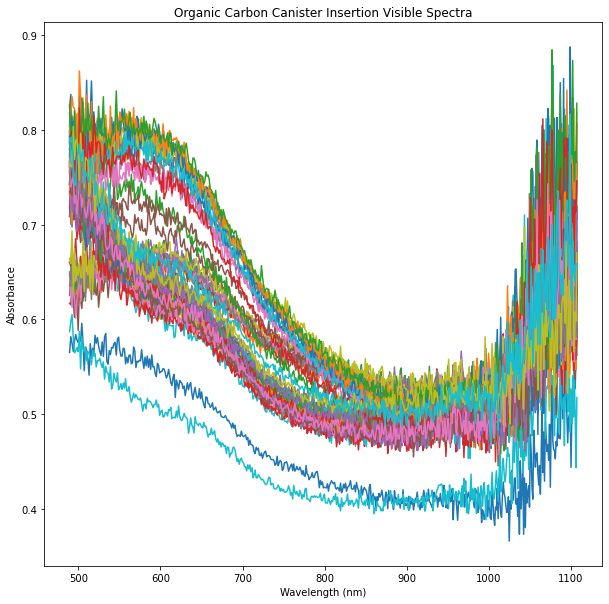

In [5]:
fix, ax = plt.subplots(figsize=(10,10))
ax.set_title("Organic Carbon Canister Insertion Visible Spectra")
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
for i in range (ins001_vis_abs.shape[0]):
    ax.plot(vis_waves, ins001_vis_abs[i, :])
plt.show()

# Automatic insertion FTIR Engine Spectra

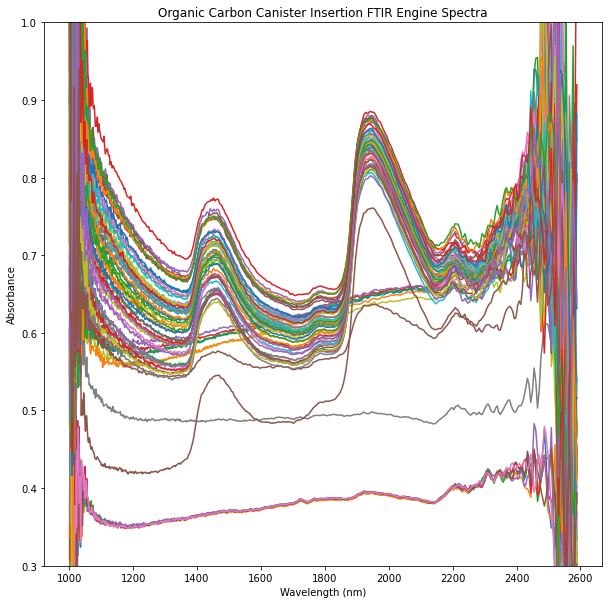

In [6]:
fix, ax = plt.subplots(figsize=(10,10))
ax.set_title("Organic Carbon Canister Insertion FTIR Engine Spectra")
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylim(0.3, 1.0)
for i in range (ins001_ftir_abs.shape[0]):
    ax.plot(ftir_waves, ins001_ftir_abs[i, :])
plt.show()

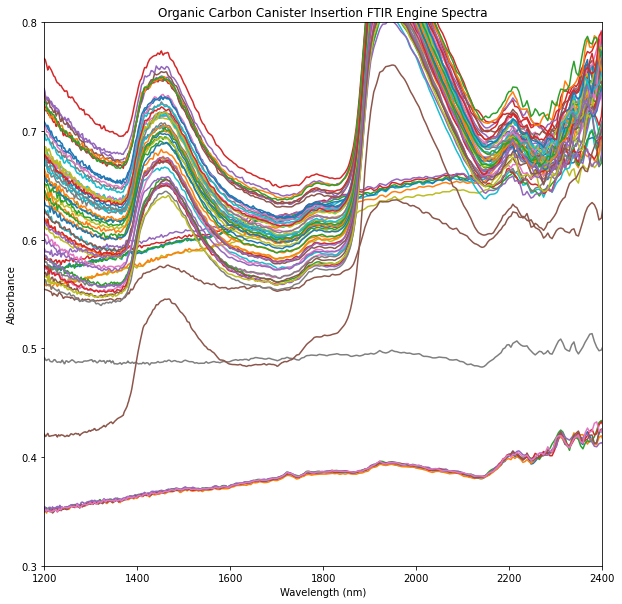

In [7]:
fix, ax = plt.subplots(figsize=(10,10))
ax.set_title("Organic Carbon Canister Insertion FTIR Engine Spectra")
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylim(0.3, 0.8)
ax.set_xlim(1200, 2400)
for i in range (ins001_ftir_abs.shape[0]):
    ax.plot(ftir_waves, ins001_ftir_abs[i, :])
plt.show()

In [8]:
ins001_force = h5_file['session002/cal001/ins001/derived/absorbance_depth'][:, -2]
ins001_depth = h5_file['session002/cal001/ins001/derived/absorbance_depth'][:, -1]

# Force by Depth for insertion

Soil canister approximate depths
- 0 - 8 cm:  none
- 8 - 20 cm: low OC
- 20 - 30 cm:  high OC
- 30 - 40 cm: low OC
- 40 - 50 cm: high OC
- 50 + cm: low OC

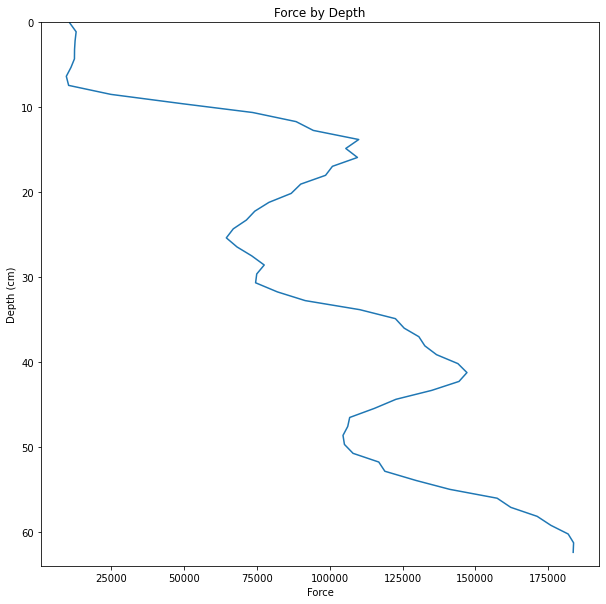

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Force by Depth")
ax.set_ylim(64.0, 0.0)
ax.set_ylabel("Depth (cm)")
ax.set_xlabel("Force")
ax.plot(ins001_force, ins001_depth + 2 );


# Visible spectra taken at set positions

In [10]:
positions = [('ins002', 20.2), ('ins003', 27.2), ('ins004', 34.4), ('ins005', 41.5),
            ('ins006', 48.4), ('ins007', 55.3), ('ins008', 64.4)]

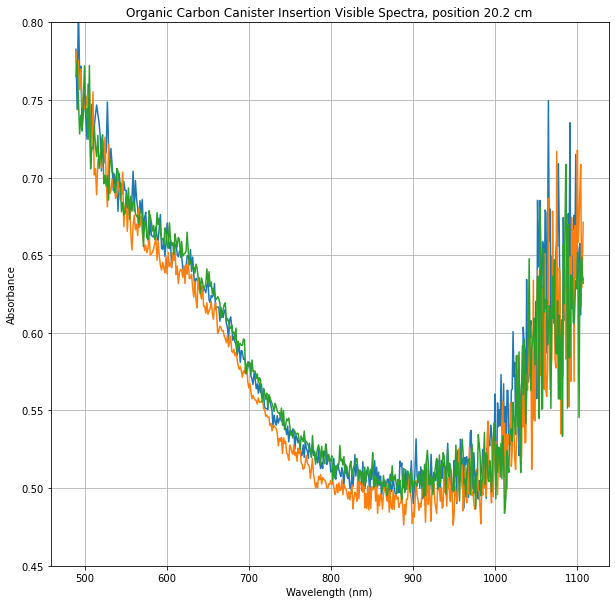

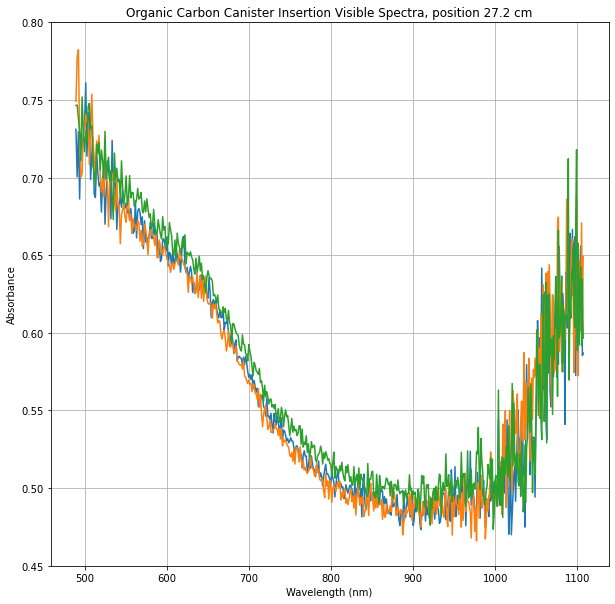

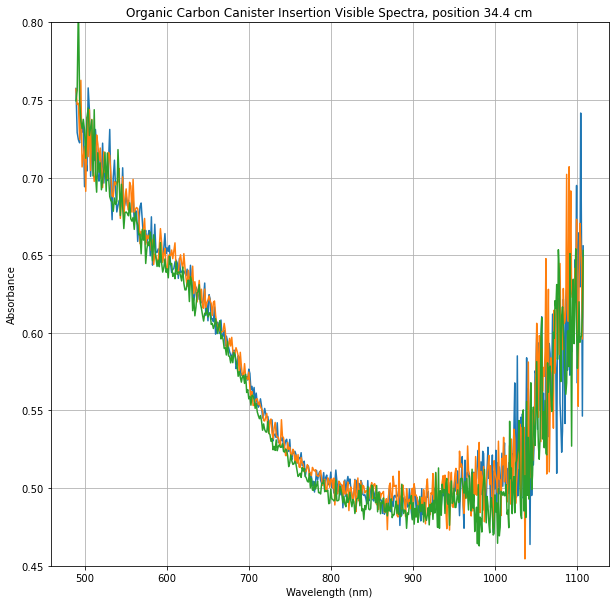

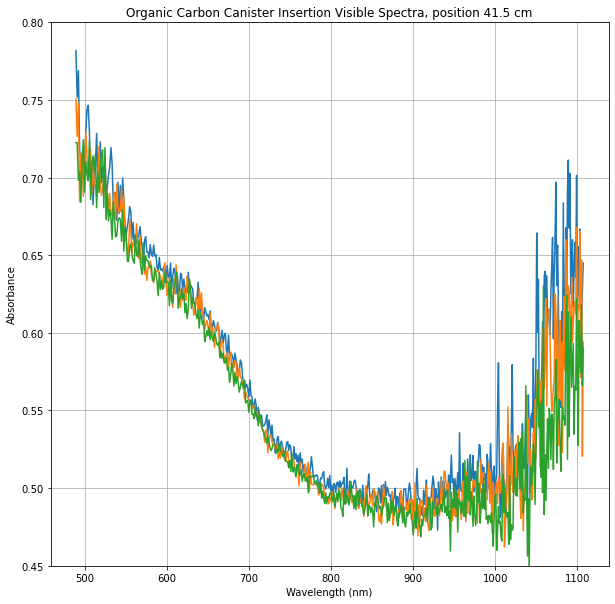

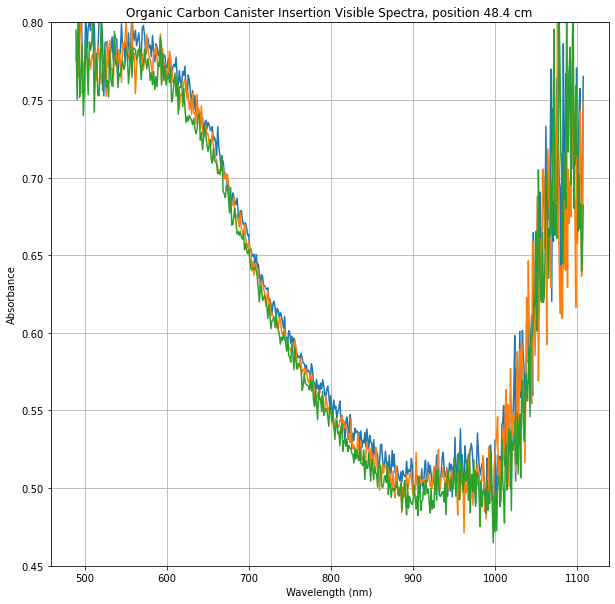

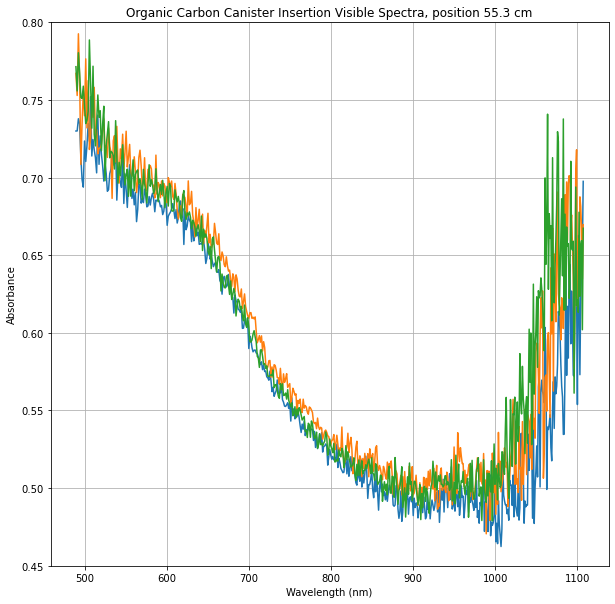

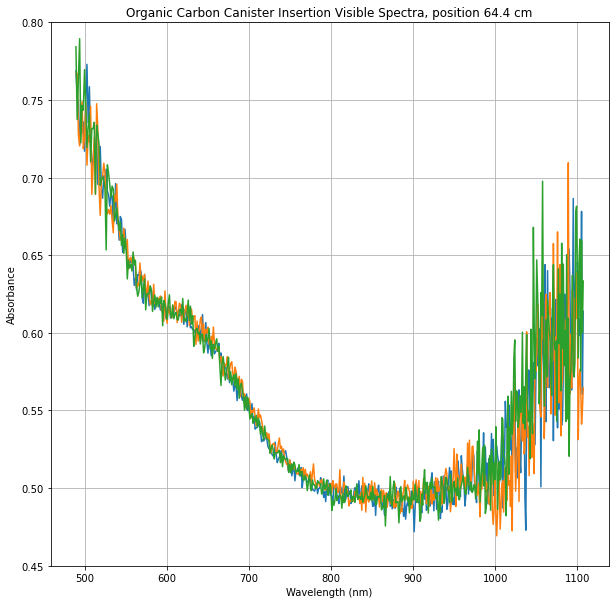

In [11]:
for position in positions:
    spectra = h5_file[f'session002/cal001/{position[0]}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Organic Carbon Canister Insertion Visible Spectra, position {position[1]} cm")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(.45, .80)
    ax.grid()
    for i in range (spectra.shape[0]):
        ax.plot(vis_waves, spectra[i, :])
    plt.show()

# FTIR Engine spectra taken at set positions

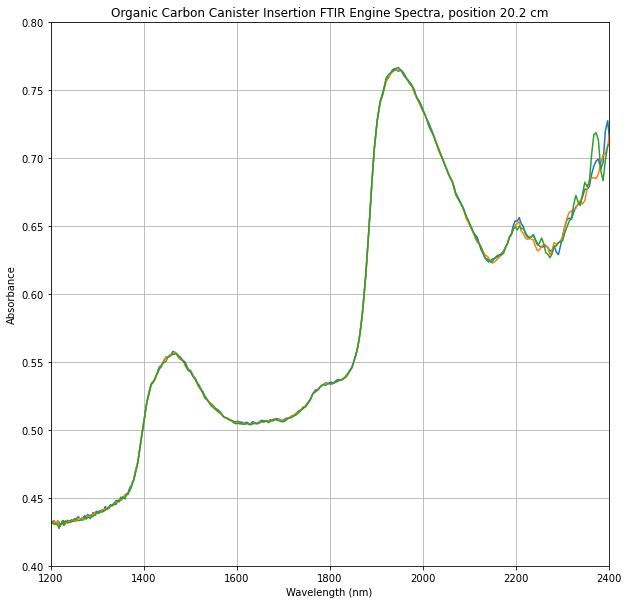

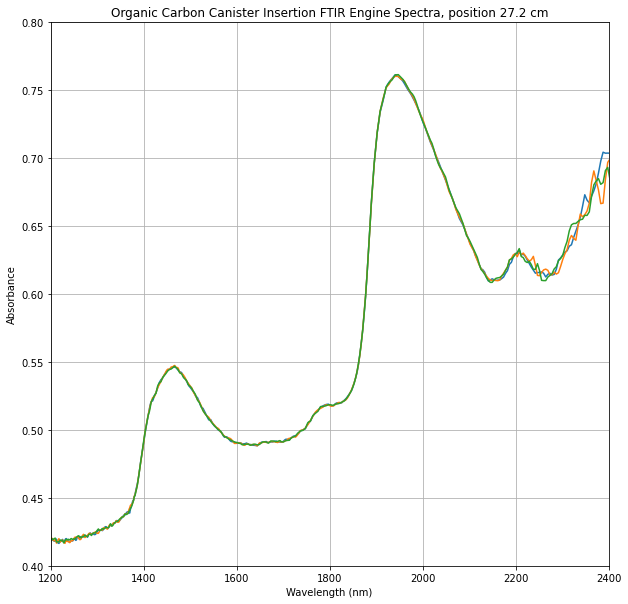

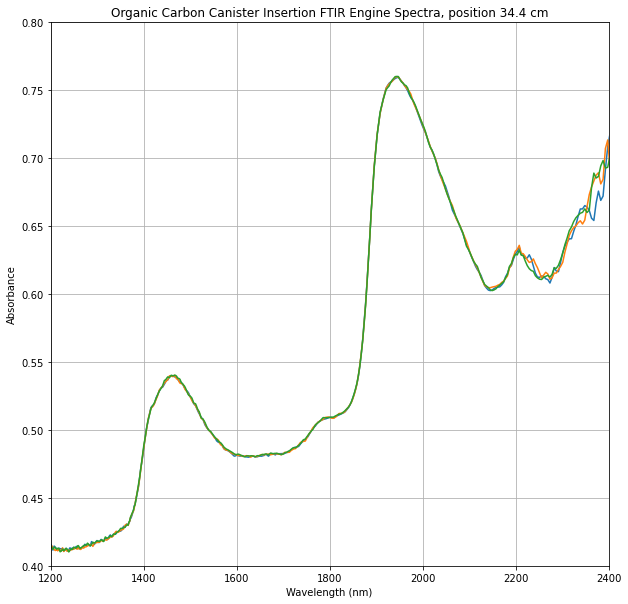

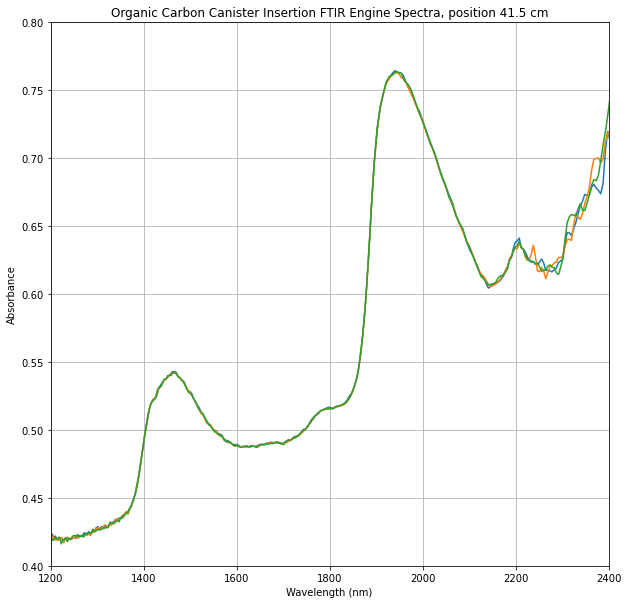

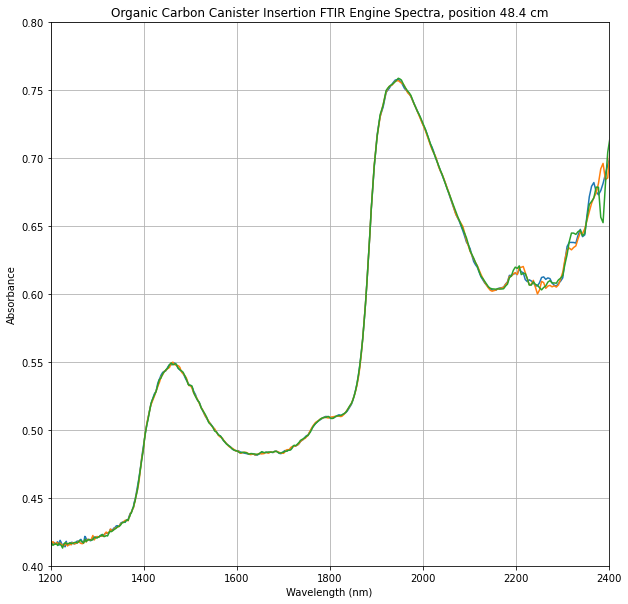

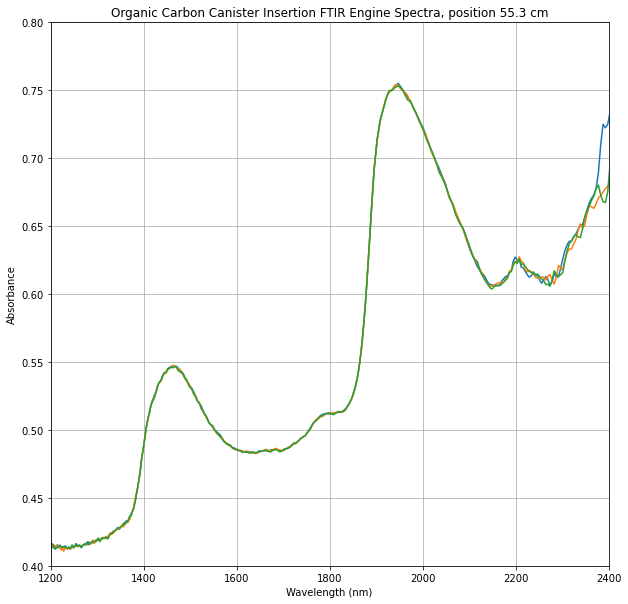

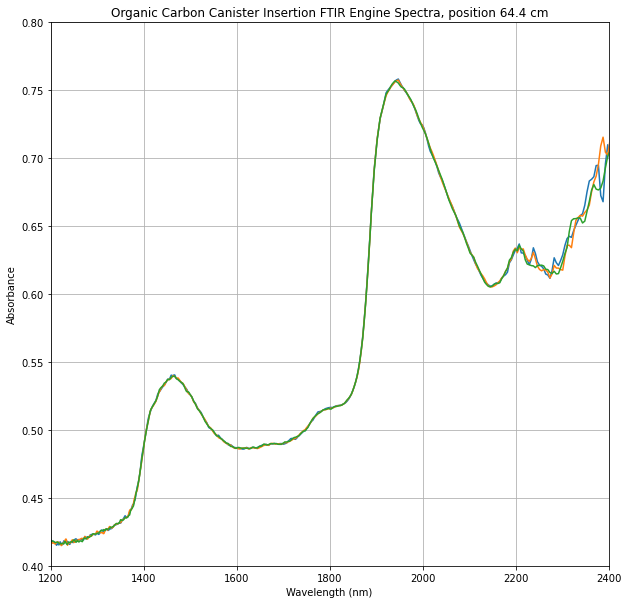

In [12]:
for position in positions:
    spectra = h5_file[f'session002/cal001/{position[0]}/spectrometer2/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Organic Carbon Canister Insertion FTIR Engine Spectra, position {position[1]} cm")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.40, 0.80)
    ax.set_xlim(1200, 2400)
    ax.grid()
    for i in range (spectra.shape[0]):
        ax.plot(ftir_waves, spectra[i, :])
    plt.show()

# Mean FTIR Engine spectra taken at set positions

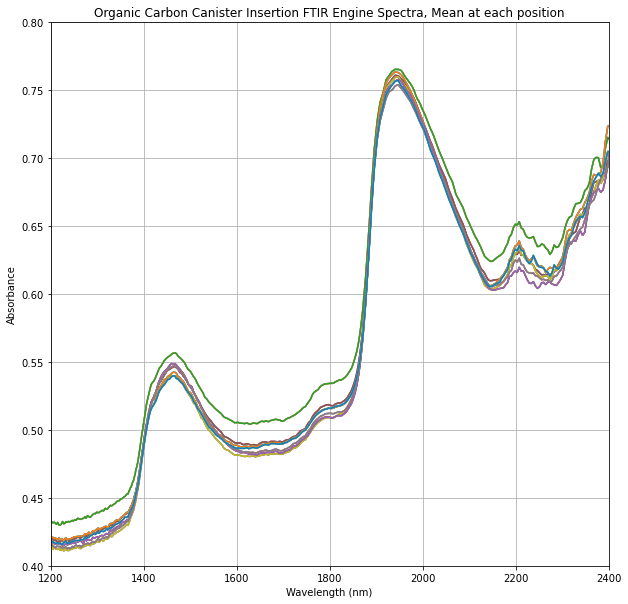

In [13]:
fix, ax = plt.subplots(figsize=(10,10))
ax.set_title(f"Organic Carbon Canister Insertion FTIR Engine Spectra, Mean at each position")
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylim(0.40, 0.80)
ax.set_xlim(1200, 2400)
ax.grid()
for position in positions:
    spectra = h5_file[f'session002/cal001/{position[0]}/spectrometer2/derived/absorbances'][:]

    for i in range (spectra.shape[0]):
        ax.plot(ftir_waves, spectra.mean(axis=0))
plt.show()


In [14]:
abs1 = h5_file['session002/cal001/ins001/derived/absorbance_depth']

In [15]:
cols = vis_waves.astype(int).tolist()
cols = cols + ftir_waves.astype(int).tolist()
cols.append('force')
cols.append('depth')

In [16]:
ins_abs_df = pd.DataFrame(data=abs1, columns=cols)

In [17]:
abs_waves = [501, 600, 701, 800, 900, 1000, 1201, 1301, 1400, 1501, 1600, 1700, 1800, 1902, 2002, 2102, 2203]

# Absorbance at different wavelengths by depth for automatic insertion

Soil canister approximate depths
- 0 - 8 cm:  none
- 8 - 20 cm: low OC
- 20 - 30 cm:  high OC
- 30 - 40 cm: low OC
- 40 - 50 cm: high OC
- 50 + cm: low OC

The reason the graphs between 1000 and 1100 nm have two lines are that the ranges of the spectrometers overlaps

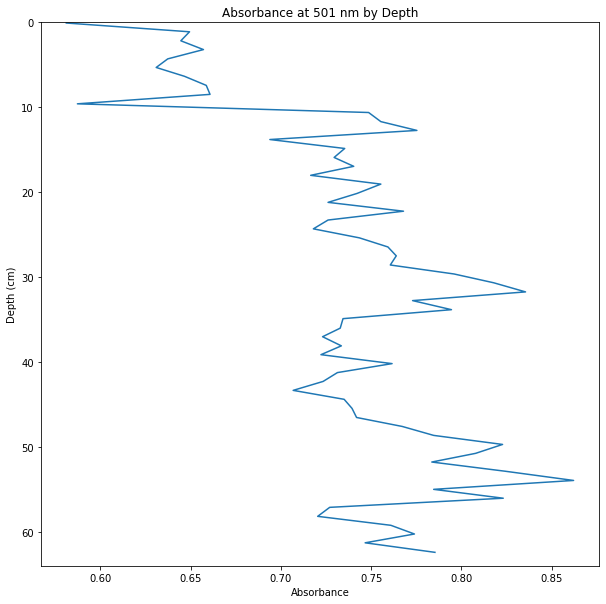

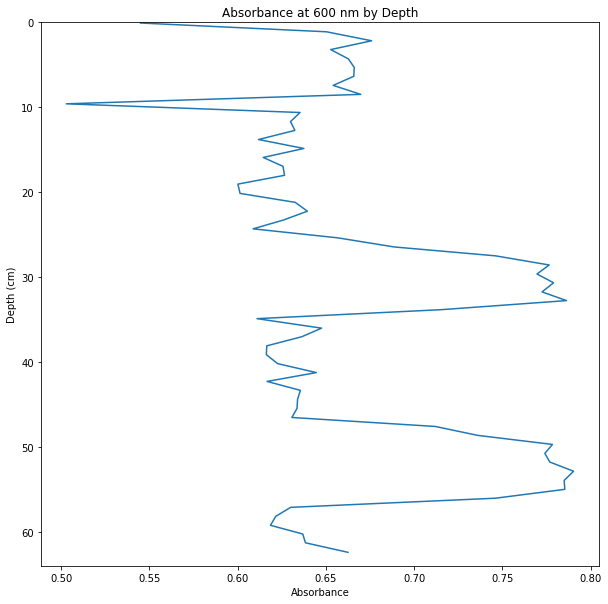

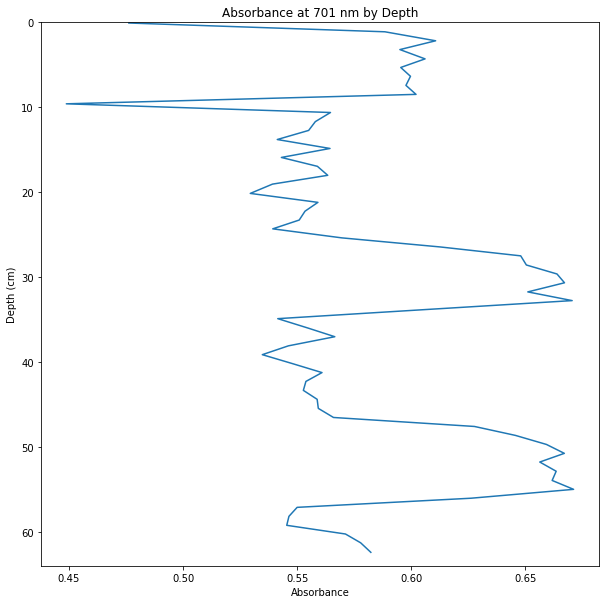

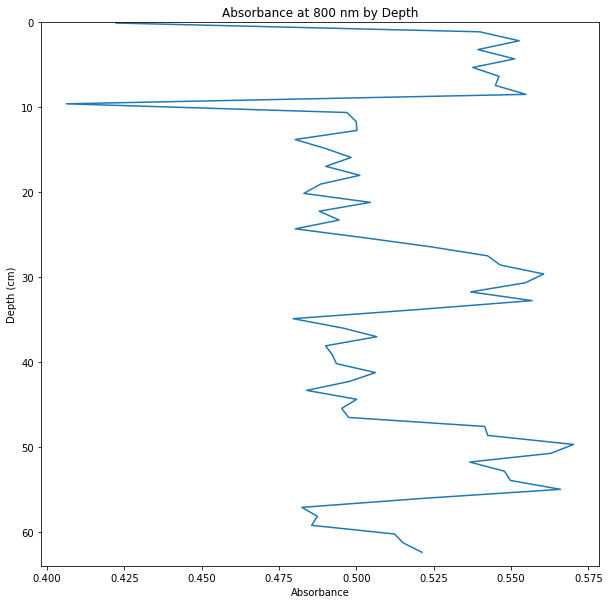

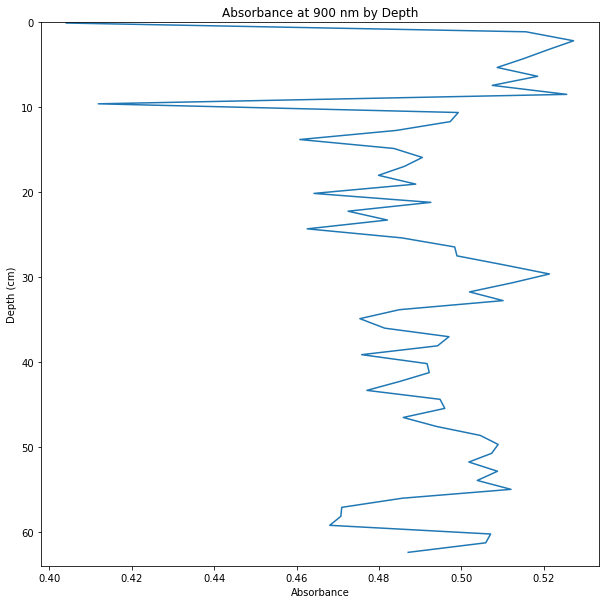

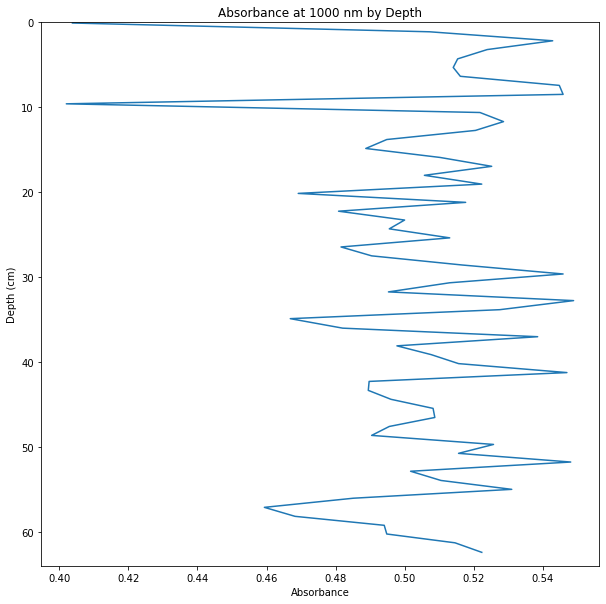

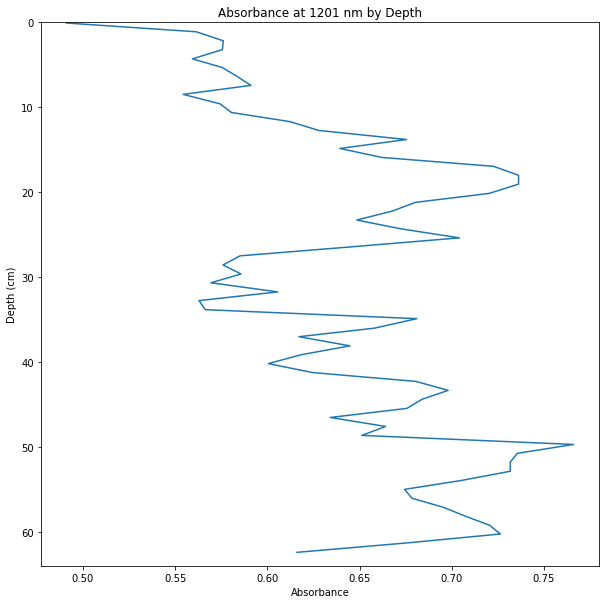

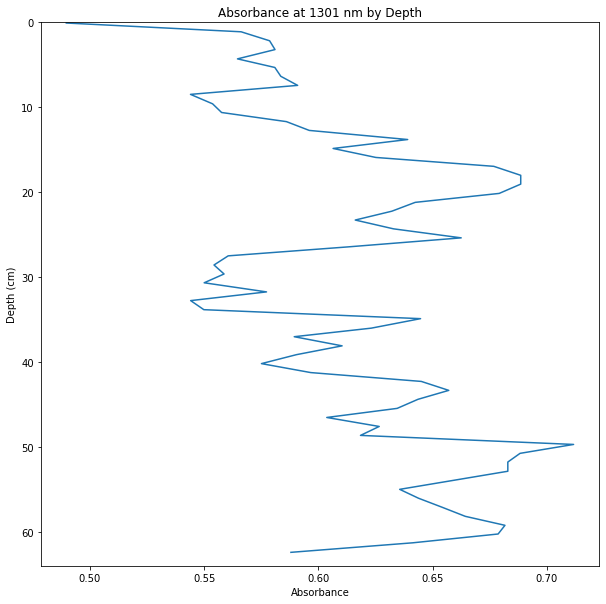

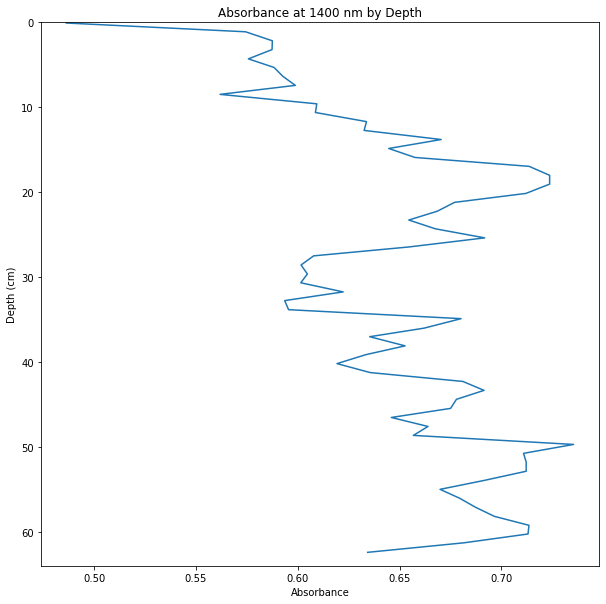

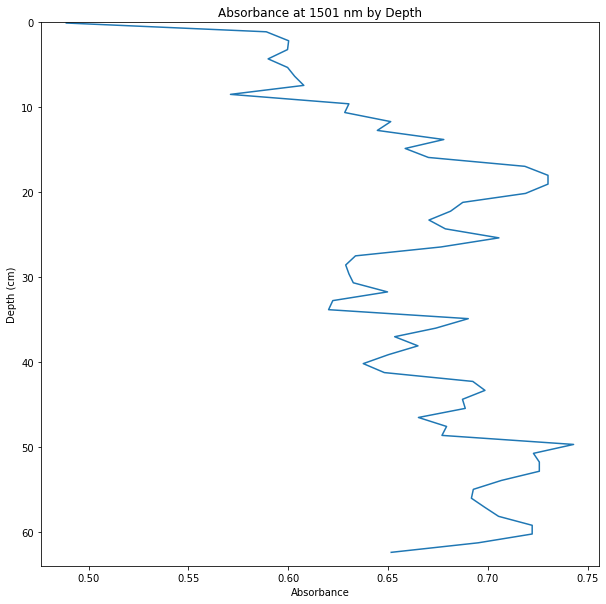

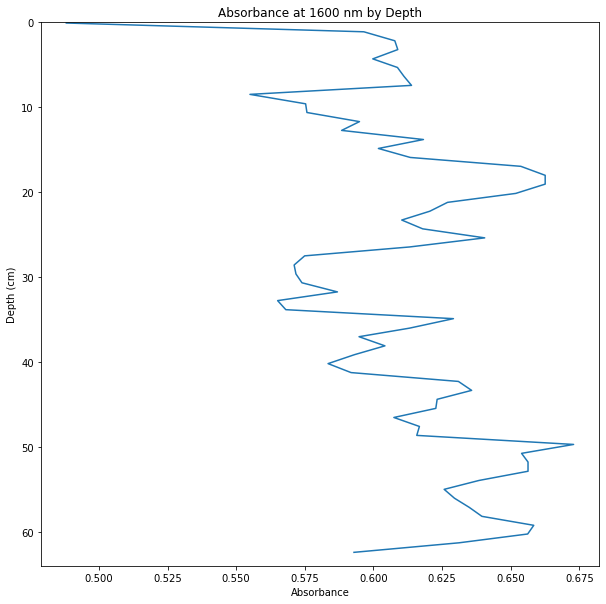

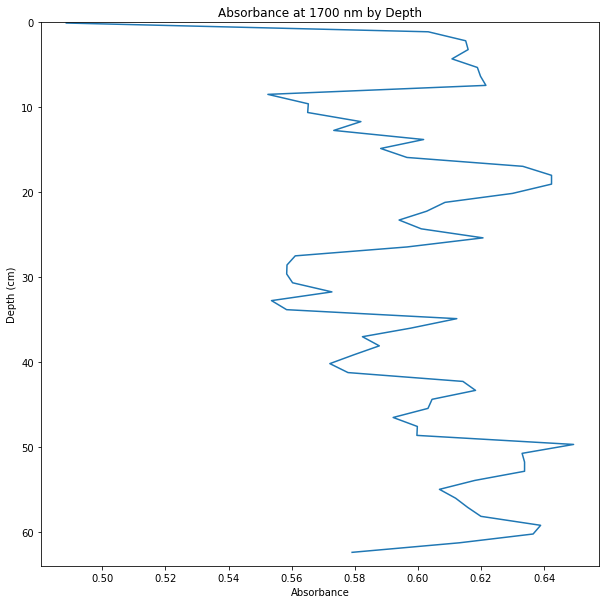

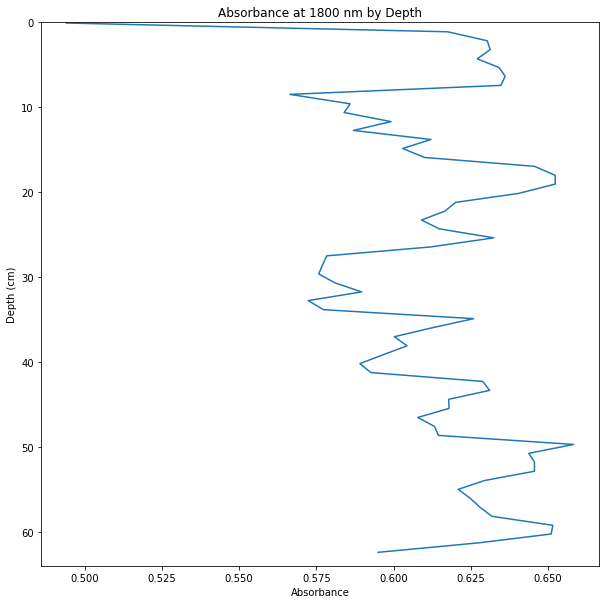

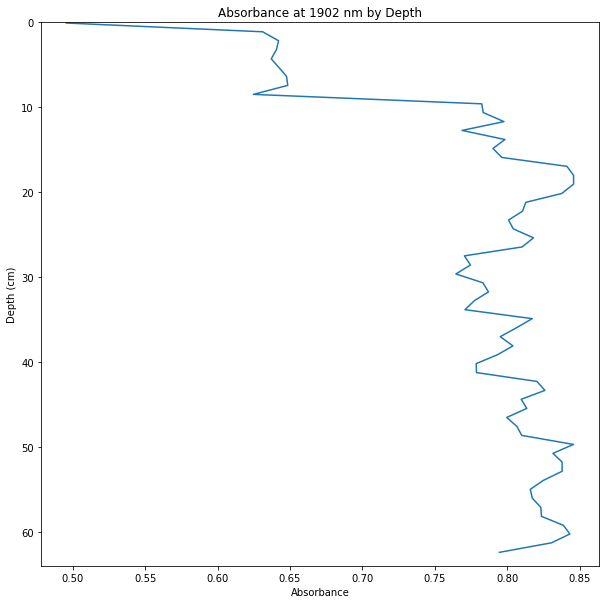

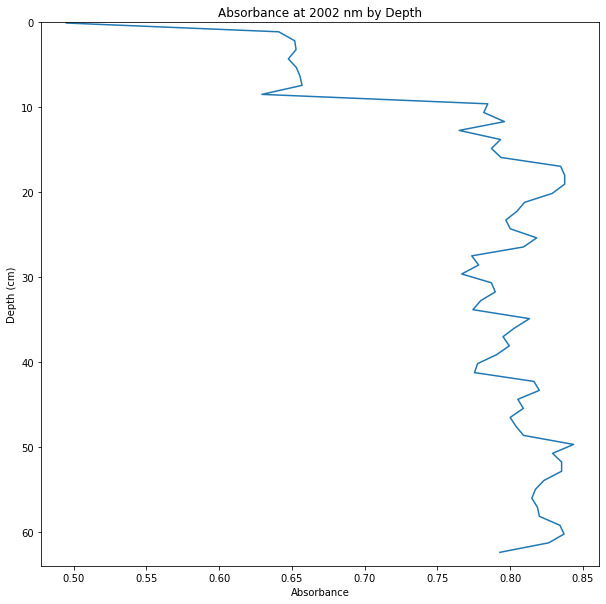

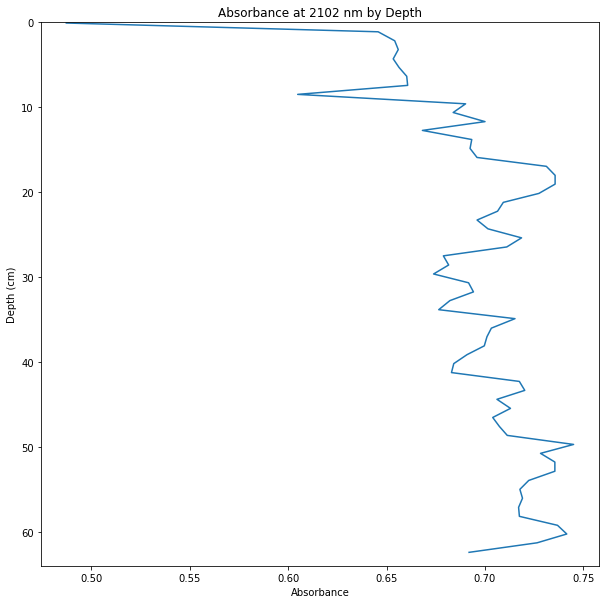

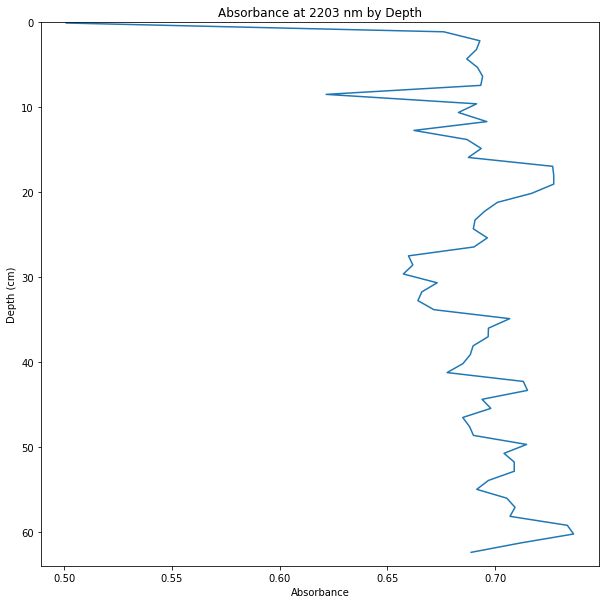

In [18]:
for i in range(len(abs_waves)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Absorbance at {abs_waves[i]} nm by Depth")
    ax.set_ylim(64.0, 0.0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Absorbance")
    ax.plot(ins_abs_df[abs_waves[i]], ins_abs_df['depth'] + 2 );
    plt.show()